## Environment Setup and Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.decomposition import PCA
import pprint

# Configuration
# Note: You must have 'glove.6B.100d.txt' in your working directory
GLOVE_INPUT_FILE = 'glove.6B.100d.txt'
WORD2VEC_OUTPUT_FILE = 'glove.6B.100d.word2vec'

# Convert GloVe format to Word2Vec format for Gensim compatibility
glove2word2vec(GLOVE_INPUT_FILE, WORD2VEC_OUTPUT_FILE)
model = KeyedVectors.load_word2vec_format(WORD2VEC_OUTPUT_FILE, binary=False)

print(f"Model loaded with {len(model)} unique word vectors.")

C:\Users\Dell\AppData\Local\Temp\ipykernel_20680\3940079253.py:14: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(GLOVE_INPUT_FILE, WORD2VEC_OUTPUT_FILE)


Model loaded with 400000 unique word vectors.


## Semantic Proximity and "Word Math"

In [2]:
def solve_analogy(a, b, c):
    """
    Solves analogies of the form: 'a' is to 'b' as 'c' is to '?'
    Equation: b - a + c
    """
    result = model.most_similar(positive=[c, b], negative=[a])
    return result[0][0]

# Examples
print(f"Paris is to France as Berlin is to: {solve_analogy('france', 'paris', 'germany')}")
print(f"Man is to King as Woman is to: {solve_analogy('man', 'king', 'woman')}")

Paris is to France as Berlin is to: berlin
Man is to King as Woman is to: queen


## Measuring Conceptual Distance

In [6]:
def solve_analogy(a,b,c):
    result = model.most_similar(positive = [c,b], negative = [a])
    return result[0][0]

# Examples
print(f"Paris is to France as Berlin is to: {solve_analogy('france', 'paris', 'germany')}")
print(f"Man is to King as Woman is to: {solve_analogy('man', 'king', 'woman')}")

Paris is to France as Berlin is to: berlin
Man is to King as Woman is to: queen


## Visualizing Clusters (Dimensionality Reduction)

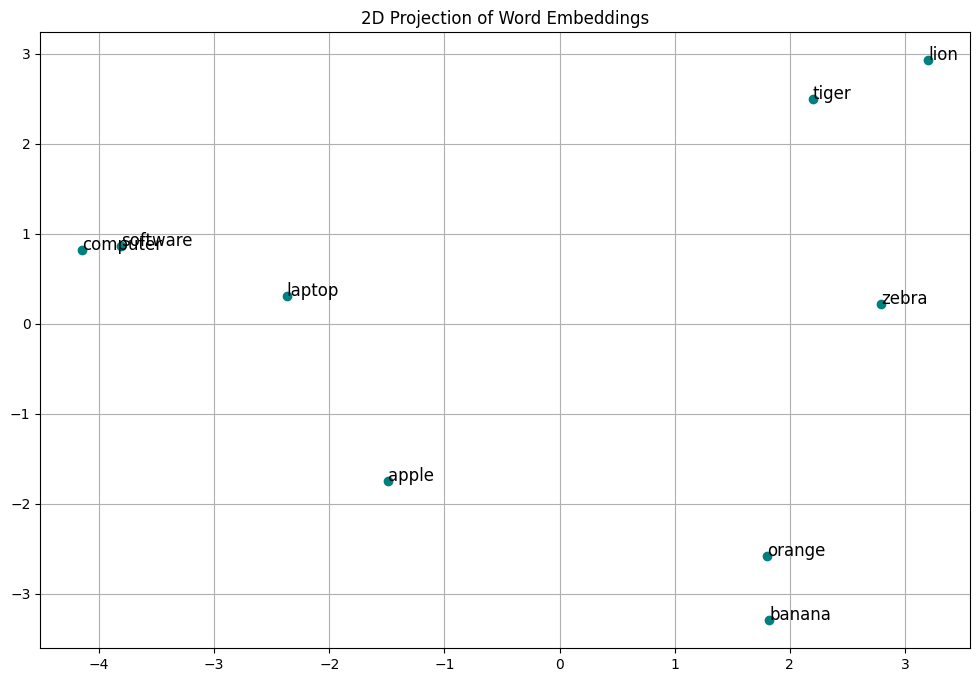

In [9]:
def plot_word_clusters(word_list):
    vectors = np.array([model[w] for w in word_list])

    #Reduce 100D to 2D
    pca= PCA(n_components = 2)
    coords = pca.fit_transform(vectors)

    plt.figure(figsize = (12,8))
    plt.scatter(coords[:,0], coords[:,1], marker="o", color="teal")

    for i,word in enumerate(word_list):
        plt.annotate(word, xy= (coords[i,0], coords[i,1]), size = 12)
    plt.title("2D Projection of Word Embeddings")
    plt.grid(True)
    plt.show()

# Testing with specific categories
test_words = ['apple', 'banana', 'orange', 'laptop', 'computer', 'software', 'tiger', 'lion', 'zebra']
plot_word_clusters(test_words)
